# Libreta de Guillermo
Se hacen pruebas sobre las distintas etapas del proyecto individualmente para después juntar lo mejor de todas

Para almacenar llaves de git: `git config credential.helper store`

# 1. Cargar los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os
from zipfile import ZipFile

## Descargar datos directamente de la página

In [ ]:
subdir = "./data/"
zip_url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
zip_file = "wine+quality.zip"
white_wine_file = "winequality-white.csv"
red_wine_file = "winequality-red.csv"

# Descarga y Descomprime el ZIP
if not os.path.exists(zip_file):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    urllib.request.urlretrieve(zip_url, subdir + zip_file)
    with ZipFile(subdir + zip_file, "r") as zip_ref:
        zip_ref.extractall(subdir)

In [ ]:
# Leer el archivo CSV en un DataFrame
df = pd.read_csv(subdir + red_wine_file, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

## Valores faltantes

In [ ]:
df.isna().sum()
# Usar pandas profiler

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Información de las columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Descripción estadística de los datos

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 2. Análisis exploratorio
Poner:
- distribuciones de las variables
- correlación con la variable objetivo
- outliers (boxplot, histograms) PyOD

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Conteo de entradas por calidad

In [ ]:
fig = px.histogram(df, x=df['quality'])
fig.update_layout(
    bargap=0.2,
    width=600,
    height=400
)
fig.show()

## Agrupar calidad en tres categorias: low, mid y high

## Transformar la variable objetivo a 3 calidades (baja, media y alta)

Dividiremos la calidad de nuestros datos en 3 categorias, ya que hay muy pocas muestras de las clases mas bajas y más altas.

In [ ]:
bins = [3,5,7,9] # Definimos los bins que separan los datos
bin_labels = ["low", "med", "high"] # Los nombres que recibiran
bin_labels_ord = [-1, 0, 1]

df["quality_cat"] = pd.cut(df["quality"], bins=bins, labels=bin_labels, right=False)
df["quality_ord"] = pd.cut(df["quality"], bins=bins, labels=bin_labels_ord, right=False)

In [ ]:
df.groupby("quality", group_keys=False).apply(lambda x: x.sample(1))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat,quality_ord
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,low,-1
813,6.9,0.390,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,4,low,-1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,med,0
211,8.0,0.725,0.24,2.8,0.083,10.0,62.0,0.99685,3.35,0.56,10.0,6,med,0
288,8.7,0.520,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,7,high,1
1549,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,8,high,1


Como se ve, ahora tenemos encasillados las calidades en 3 grupos (el numérico es para entrenar)

## Boxplots por calidad

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_cat', 'quality_ord'],
      dtype='object')

In [ ]:
fig = make_subplots(rows=3, cols=4, subplot_titles=df.columns.drop(['quality', 'quality_cat', 'quality_ord']))

for i, column in enumerate(df.columns.drop(['quality', 'quality_cat', 'quality_ord'])):
    row = (i // 4) + 1
    col = (i % 4) + 1
    box_trace = go.Box(x=df['quality_cat'], y=df[column], name=column)
    fig.add_trace(box_trace, row=row, col=col)
    fig.update_xaxes(title_text='Quality', row=row, col=col)

fig.update_layout(
    showlegend=False,
    height=1200,
    width=1750
)
fig.show()

## Matriz de correlación con las características originales

<Axes: >

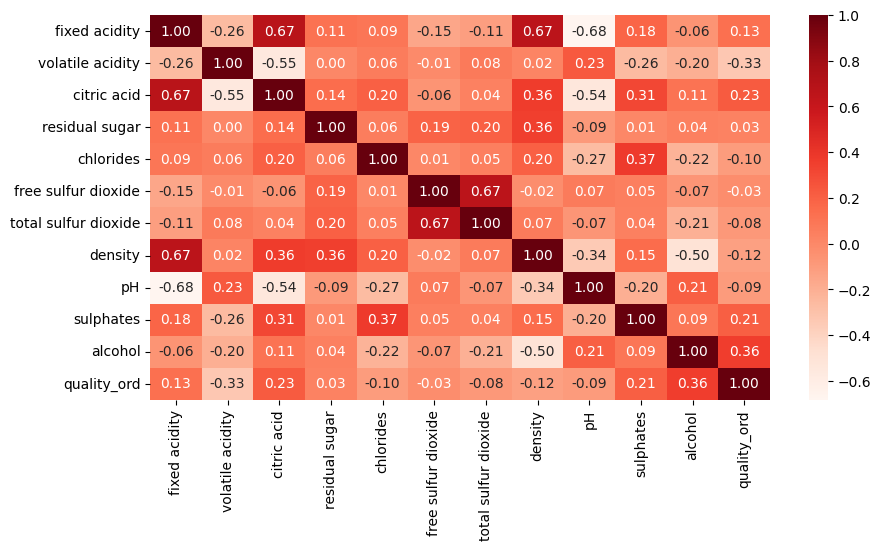

In [ ]:
# correlation and headtmap
plt.figure(figsize = (10,5))
#cambiamos la variable quality_ord a int para poder calcular correlacion
df['quality_ord'] = df['quality_ord'].astype('int')
corr_matrix = df.drop(columns=["quality_cat","quality"]).corr()
sns.heatmap(corr_matrix, annot=True,cmap='Reds', fmt = '.2f')
# Quitar parte de abajo

# Limpieza

In [ ]:
quality_corr = corr_matrix.loc["quality_ord"].abs().sort_values()
quality_corr

free sulfur dioxide     0.025075
residual sugar          0.030153
total sulfur dioxide    0.081960
pH                      0.093946
chlorides               0.098829
density                 0.123566
fixed acidity           0.125886
sulphates               0.205409
citric acid             0.228930
volatile acidity        0.333816
alcohol                 0.361363
quality_ord             1.000000
Name: quality_ord, dtype: float64

In [ ]:
# Variables con baja correlación
CORR_THRESH = 0.10 # Una correlación menor se considera muy baja
low_corr_vars = quality_corr[quality_corr < CORR_THRESH]
low_corr_vars

free sulfur dioxide     0.025075
residual sugar          0.030153
total sulfur dioxide    0.081960
pH                      0.093946
chlorides               0.098829
Name: quality_ord, dtype: float64

In [ ]:
low_corr_names = low_corr_vars.index.tolist()
low_corr_names # Esta lista contiene las columnas que quitaremos

['free sulfur dioxide',
 'residual sugar',
 'total sulfur dioxide',
 'pH',
 'chlorides']

In [ ]:
df_trans = df.drop(columns=low_corr_names)
df_trans.head()

,fixed acidity,volatile acidity,citric acid,density,sulphates,alcohol,quality,quality_cat,quality_ord
0,7.4,0.70,0.00,0.9978,0.56,9.4,5,med,0
1,7.8,0.88,0.00,0.9968,0.68,9.8,5,med,0
2,7.8,0.76,0.04,0.9970,0.65,9.8,5,med,0
3,11.2,0.28,0.56,0.9980,0.58,9.8,6,med,0
4,7.4,0.70,0.00,0.9978,0.56,9.4,5,med,0


## Matriz de correlación con las características reducidas (cambiar los colores a la mas chila)

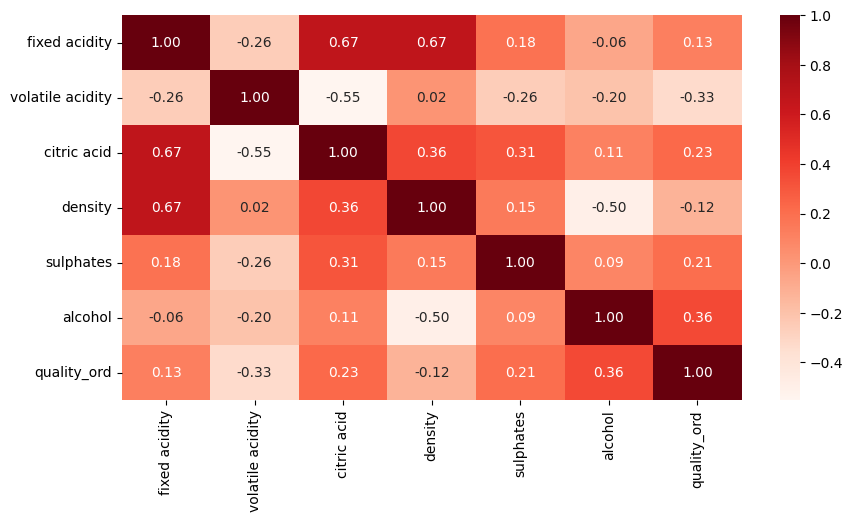

In [ ]:
# correlation and headtmap
plt.figure(figsize = (10,5))
trans_corr_matrix = df_trans.drop(columns=["quality_cat","quality"]).corr()
sns.heatmap(trans_corr_matrix, annot=True,cmap='Reds', fmt = '.2f')
plt.show()

## Outliers

In [ ]:
df_trans.describe()

,fixed acidity,volatile acidity,citric acid,density,sulphates,alcohol,quality,quality_ord
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.996747,0.658149,10.422983,5.636023,0.096310
std,1.741096,0.179060,0.194801,0.001887,0.169507,1.065668,0.807569,0.407354
min,4.600000,0.120000,0.000000,0.990070,0.330000,8.400000,3.000000,-1.000000
25%,7.100000,0.390000,0.090000,0.995600,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,0.996750,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,0.997835,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,1.003690,2.000000,14.900000,8.000000,1.000000


En algunos casos se puede ver que el valor máximo esta muy por encima de la media, lo que nos puede decir que hay outliers

In [ ]:
fig = make_subplots(rows=2, cols=3, subplot_titles=df_trans.columns.drop(['quality', 'quality_cat', 'quality_ord']))

for i, column in enumerate(df_trans.columns.drop(['quality', 'quality_cat', 'quality_ord'])):
    row = (i // 3) + 1
    col = (i % 3) + 1
    box_trace = go.Box(x=df_trans['quality_cat'], y=df_trans[column], name=column)
    fig.add_trace(box_trace, row=row, col=col)
    fig.update_xaxes(title_text='Quality', row=row, col=col)

fig.update_layout(
    showlegend=False,
    height=980,
    width=1600
)
fig.show()

## Detectar outliers usando LocalOutlierFactor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20)
X = df_trans.drop(columns=['quality', 'quality_cat', 'quality_ord'])
estimado_LOF = clf.fit_predict(X)

print(f"Cantidad de outliers: {abs(estimado_LOF[estimado_LOF==-1].sum())}")

Cantidad de outliers: 56


Filtrar los outliers

In [ ]:
df_clean = df_trans[~(estimado_LOF==-1)]
df_clean.shape

(1543, 9)

In [ ]:
df_clean.describe()

,fixed acidity,volatile acidity,citric acid,density,sulphates,alcohol,quality,quality_ord
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,8.272456,0.526805,0.264718,0.996709,0.647971,10.410337,5.637719,0.097213
std,1.645522,0.174722,0.190946,0.001844,0.144487,1.033381,0.797404,0.402181
min,4.600000,0.120000,0.000000,0.990070,0.330000,8.800000,3.000000,-1.000000
25%,7.100000,0.390000,0.090000,0.995600,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.250000,0.996720,0.620000,10.200000,6.000000,0.000000
75%,9.150000,0.640000,0.420000,0.997800,0.720000,11.083333,6.000000,0.000000
max,13.700000,1.330000,0.750000,1.003690,1.610000,14.000000,8.000000,1.000000


In [ ]:
fig = make_subplots(rows=2, cols=3, subplot_titles=df_clean.columns.drop(['quality', 'quality_cat', 'quality_ord']))

for i, column in enumerate(df_clean.columns.drop(['quality', 'quality_cat', 'quality_ord'])):
    row = (i // 3) + 1
    col = (i % 3) + 1
    box_trace = go.Box(x=df_clean['quality_cat'], y=df_clean[column], name=column)
    fig.add_trace(box_trace, row=row, col=col)
    fig.update_xaxes(title_text='Quality', row=row, col=col)

fig.update_layout(
    showlegend=False,
    height=980,
    width=1600
)
fig.show()

## Comparar ambos dataset en columnas y filas

In [ ]:
print(f"Forma de los datos originales: {df.shape}")
print(f"Forma de los datos transformados (quitando outliers y variables con baja correlación): {df_clean.shape}")

Forma de los datos originales: (1599, 14)
Forma de los datos transformados (quitando outliers y variables con baja correlación): (1543, 9)


# 3. Entrenamiento

## Pipeline
Un pipeline nos facilita el probar fácilmente a la hora de elegir los mejores parámetros

In [ ]:
from pprint import pprint
from typing import Union

# Importar los clasificadores y escaladores necesarios
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

# Importar GridSearchCV para realizar la búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# definimos la función que toma datos y devuelve los mejores parámetros

def search_params(X, y, random=False, n_iter=100):
    # Definir el pipeline con los escaladores y clasificadores
    pipeline = Pipeline([
        ('scaler', None),  # El escalador será seleccionado automáticamente por GridSearchCV
        ('classifier', None),  # El clasificador será seleccionado automáticamente por GridSearchCV
    ])

    # Definir los parámetros para GridSearchCV

    # NOTA: para los parámetros del clasificador se utiliza el prefijo classifier__ por convención
    # para indicar que ese parámetro es para el valor de la clave 'classifier'
    parameters = [
        # Probar distintos escaladores con distintos parámetros de RandomForestClassifier
        {
            'scaler': [Normalizer(), StandardScaler(), MinMaxScaler()],
            'classifier': [RandomForestClassifier()],
            # Parametros del clasificador
            'classifier__n_jobs': [-1],
            'classifier__n_estimators': np.linspace(50, 500, 10).astype(int),
            'classifier__max_features': ['sqrt', 'log2'],
            'classifier__max_depth': np.linspace(5, 30, 6).astype(int),
            'classifier__criterion': ['gini', 'entropy', 'log_loss'],
        },

        # Probar distintos escaladores con distintos parámetros de SVC
        {
            'scaler': [Normalizer(), StandardScaler(), MinMaxScaler()],
            'classifier': [SVC()],
            # Parámetros del clasificador
            'classifier__probability': [True],
            'classifier__C': np.linspace(1, 100, 10),
            'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'classifier__gamma': ['scale', 'auto'],
        },

        # Probar distintos escaladores con distintos parámetros de KNeighborsClassifier
        {
            'scaler': [Normalizer(), StandardScaler(), MinMaxScaler()],
            'classifier': [KNeighborsClassifier()],
            # Parámetros del clasificador
            'classifier__n_neighbors': np.linspace(5, 25, 5).astype(int),
            'classifier__weights': ['uniform', 'distance'],
        },
    ]

    print(f"Los parámetros para probar en nuestras pipelines son:")
    pprint(parameters)

    # Creamos un pipeline con parámetros por defecto (serán sustituidos)
    pipeline = Pipeline([
        ('scaler', None),
        ('classifier', None)
    ])

    if random:
        search = RandomizedSearchCV(pipeline, parameters, cv=5, n_jobs=-1, scoring='f1_weighted', verbose=1, n_iter=n_iter)
    else:
        search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, scoring='f1_weighted', verbose=1)

    search.fit(X, y)

    # Obtener los mejores hiperparámetros y el mejor modelo
    best_params = search.best_params_
    best_model = search.best_estimator_

    print(f"Los mejores parámetros de la busqueda: {best_params}")
    print(f"El mejor modelo de la busqueda: {best_model}")

    return best_model, best_params

## Primer entrenamiento: usando todas las columnas
El primer entrenamiento lo llevaremos a cabo usando todas las columnas que venian originalmente en el DataFrame. La unica diferenciaes el cambio de la variable objetivo pues utilizaremos como variable objetivo quality_ord.

In [ ]:
X = df.drop(columns=["quality", "quality_cat", "quality_ord"]).to_numpy() # Quitamos las variables de la calidad
y = df["quality_ord"].to_numpy()  # Nos quedamos solo con la caliad (ordinal: -1, 0, 1)

X.shape, y.shape

((1599, 11), (1599,))

In [ ]:
from sklearn.model_selection import train_test_split

n_folds = 5

test_size = 0.10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

print(f"Se usarán {X_train.shape[0]} entradas para el entrenamiento del modelo usando K-Fold ({n_folds} folds)")
print(f"Se reservó un {int(test_size*100)}% de los datos ({X_test.shape[0]}) para validar al final del entrenamiento.")

Se usarán 1439 entradas para el entrenamiento del modelo usando K-Fold (5 folds)
Se reservó un 10% de los datos (160) para validar al final del entrenamiento.


In [ ]:
best_model, best_params = search_params(X_train, y_train, random=False)

Los parámetros para probar en nuestras pipelines son:
[{'classifier': [RandomForestClassifier()],
  'classifier__criterion': ['gini', 'entropy', 'log_loss'],
  'classifier__max_depth': array([ 5, 10, 15, 20, 25, 30]),
  'classifier__max_features': ['sqrt', 'log2'],
  'classifier__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
  'classifier__n_jobs': [-1],
  'scaler': [Normalizer(), StandardScaler(), MinMaxScaler()]},
 {'classifier': [SVC()],
  'classifier__C': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]),
  'classifier__gamma': ['scale', 'auto'],
  'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
  'classifier__probability': [True],
  'scaler': [Normalizer(), StandardScaler(), MinMaxScaler()]},
 {'classifier': [KNeighborsClassifier()],
  'classifier__n_neighbors': array([ 5, 10, 15, 20, 25]),
  'classifier__weights': ['uniform', 'distance'],
  'scaler': [Normalizer(), StandardScaler(), MinMaxScaler()]}]
Fitting 5 folds for ea

In [ ]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=30,
                                        n_estimators=200, n_jobs=-1))])

Vemos el score en general del modelo en el X_test

In [ ]:
print('Training set score: ' + str(best_model.score(X_train, y_train)))
print('Test set score: ' + str(best_model.score(X_test, y_test)))

Training set score: 1.0
Test set score: 0.9


Ahora vemos individualmente por categoria

In [ ]:
X_test_df = pd.DataFrame(X_test, columns = df.drop(columns=["quality", "quality_cat", "quality_ord"]).columns)
y_test_df = pd.Series(y_test)

print('Training set score -1: ' + str(best_model.score(X_test_df.loc[y_test_df[y_test_df == -1].index].to_numpy(), y_test_df[y_test_df == -1])))
print('Training set score 0: ' + str(best_model.score(X_test_df.loc[y_test_df[y_test_df == 0].index].to_numpy(), y_test_df[y_test_df == 0])))
print('Training set score 1: ' + str(best_model.score(X_test_df.loc[y_test_df[y_test_df == 1].index].to_numpy(), y_test_df[y_test_df == 1])))

Training set score -1: 0.0
Training set score 0: 0.9848484848484849
Training set score 1: 0.6363636363636364


In [110]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [111]:
y_hat = best_model.predict(X_test)

print(confusion_matrix(y_test, y_hat))
print(accuracy_score(y_test, y_hat))
print(f1_score(y_test, y_hat, average='micro'))
print(classification_report(y_test, y_hat))

[[  0   6   0]
 [  0 130   2]
 [  0   8  14]]
0.9
0.9
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         6
           0       0.90      0.98      0.94       132
           1       0.88      0.64      0.74        22

    accuracy                           0.90       160
   macro avg       0.59      0.54      0.56       160
weighted avg       0.87      0.90      0.88       160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Al realizar nuestra predicción podemos darnos cuenta que el modelo no predice de manera acertada, ya que para la calidad -1 tiene un fallo total. Esto principalmente debido a que son muy pocos datos de dicha categoria.

## Segundo entrenamiento: filtrando las columnas con baja corelación

## Definir X y y como matrices

In [ ]:
X = df_clean.drop(columns=["quality", "quality_cat", "quality_ord"]).to_numpy() # Quitamos las variables de la calidad
y = df_clean["quality_ord"].to_numpy()  # Nos quedamos solo con la caliad (ordinal: -1, 0, 1)

X.shape, y.shape

((1543, 6), (1543,))

## Dividir en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

print(f"Se usarán {X_train.shape[0]} entradas para el entrenamiento del modelo usando K-Fold ({n_folds} folds)")
print(f"Se reservó un {int(test_size*100)}% de los datos ({X_test.shape[0]}) para validar al final del entrenamiento.")

Se usarán 1388 entradas para el entrenamiento del modelo usando K-Fold (5 folds)
Se reservó un 10% de los datos (155) para validar al final del entrenamiento.


## Entrenamiento del modelo
Va a tardar bastante ya que esta probando todas las combinaciones posibles del diccionario de arriba

In [ ]:
best_model, best_params = search_params(X_train, y_train, random=False)

Los parámetros para probar en nuestras pipelines son:
[{'classifier': [RandomForestClassifier()],
  'classifier__criterion': ['gini', 'entropy', 'log_loss'],
  'classifier__max_depth': array([ 5, 10, 15, 20, 25, 30]),
  'classifier__max_features': ['sqrt', 'log2'],
  'classifier__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
  'classifier__n_jobs': [-1],
  'scaler': [Normalizer(), StandardScaler(), MinMaxScaler()]},
 {'classifier': [SVC()],
  'classifier__C': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]),
  'classifier__gamma': ['scale', 'auto'],
  'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
  'classifier__probability': [True],
  'scaler': [Normalizer(), StandardScaler(), MinMaxScaler()]},
 {'classifier': [KNeighborsClassifier()],
  'classifier__n_neighbors': array([ 5, 10, 15, 20, 25]),
  'classifier__weights': ['uniform', 'distance'],
  'scaler': [Normalizer(), StandardScaler(), MinMaxScaler()]}]
Fitting 5 folds for ea

In [ ]:
print(best_model)

Pipeline(steps=[('scaler', Normalizer()),
                ('classifier',
                 RandomForestClassifier(max_depth=25, max_features='log2',
                                        n_estimators=250, n_jobs=-1))])


In [ ]:
best_params

{'classifier': RandomForestClassifier(max_depth=25, max_features='log2', n_estimators=250,
                        n_jobs=-1),
 'classifier__criterion': 'gini',
 'classifier__max_depth': 25,
 'classifier__max_features': 'log2',
 'classifier__n_estimators': 250,
 'classifier__n_jobs': -1,
 'scaler': Normalizer()}

In [ ]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', Normalizer()),
                ('classifier',
                 RandomForestClassifier(max_depth=25, max_features='log2',
                                        n_estimators=250, n_jobs=-1))])

In [ ]:
print('Training set score: ' + str(best_model.score(X_train, y_train)))
print('Test set score: ' + str(best_model.score(X_test, y_test)))

Training set score: 1.0
Test set score: 0.8258064516129032


In [ ]:
y_hat = best_model.predict(X_test)

print(confusion_matrix(y_test, y_hat))
print(accuracy_score(y_test, y_hat))
print(f1_score(y_test, y_hat, average='micro'))
print(classification_report(y_test, y_hat))

[[  0   6   0]
 [  1 122   5]
 [  0  15   6]]
0.8258064516129032
0.8258064516129032
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         6
           0       0.85      0.95      0.90       128
           1       0.55      0.29      0.37        21

    accuracy                           0.83       155
   macro avg       0.47      0.41      0.43       155
weighted avg       0.78      0.83      0.79       155

